# Statistical Analysis of Credit Card Customer Churn Rate

# TABLE OF CONTENT
1. **[INTRODUCTION TO DATA SET](#ADS)**
2. **[DESCRIPTIVE STATISTICS](#DS)**
3. **[HYPOTHESIS TESTING](#HT)**
4. **[SIMULATION](#SIMUL)**

In [1]:
##import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import random
import statistics
from scipy.stats import shapiro 

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import scikit_posthocs

 <a id = "ADS"> </a>
# INTRODUCTION TO DATASET

In [2]:
## load the dataset

Bank_data = pd.read_csv("Bank_Churners.csv")
Bank_data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,40000-60000,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,40000-60000,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than 40000,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,40000-60000,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than 40000,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [3]:
## Checking the shape of data
Bank_data.shape

(10127, 21)

The data definition which comes with the data is as follows:

CLIENTNUM: Client number. Unique identifier for the customer holding the account

Attrition_Flag:Internal event (customer activity) variable - if the account is closed then 1 else 0

Customer_Age: Demographic variable - Customer's Age in Years

Gender : M=Male, F=Female

Dependent_count: Number of dependents

Education_Level: Educational Qualification of the account holder (example: high school, college graduate, etc.)

Marital_Status: Married, Single, Divorced, Unknown

Income_Category:Annual Income Category of the account holder (< 40𝐾, 40K - 60K, 60𝐾− 80K, 80𝐾− 120K)

Card_Category : Type of Card (Blue, Silver, Gold, Platinum)

Months_on_book: Period of relationship with bank

Total_Relationship_Count : Total no. of products held by the customer

Months_Inactive_12_mon : No. of months inactive in the last 12 months

Contacts_Count_12_mon : No. of Contacts in the last 12 months

Credit_Limit : Credit Limit on the Credit Card

Total_Revolving_Bal : Total Revolving Balance on the Credit Card

Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt :Total Transaction Amount (Last 12 months)

Total_Trans_Ct : Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio : Average Card Utilization Ratio

In [4]:
churn_data = Bank_data[Bank_data.Attrition_Flag == 'Attrited Customer']
churn_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than 40000,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than 40000,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,M,2,Graduate,Married,120000+,Blue,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,60000-80000,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000


In [5]:
churn_data.shape

(1627, 21)

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 21 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 1627 non-null   int64  
 1   Attrition_Flag            1627 non-null   object 
 2   Customer_Age              1627 non-null   int64  
 3   Gender                    1627 non-null   object 
 4   Dependent_count           1627 non-null   int64  
 5   Education_Level           1627 non-null   object 
 6   Marital_Status            1627 non-null   object 
 7   Income_Category           1627 non-null   object 
 8   Card_Category             1627 non-null   object 
 9   Months_on_book            1627 non-null   int64  
 10  Total_Relationship_Count  1627 non-null   int64  
 11  Months_Inactive_12_mon    1627 non-null   int64  
 12  Contacts_Count_12_mon     1627 non-null   int64  
 13  Credit_Limit              1627 non-null   float64
 14  Total_

In [7]:
churn_data['Customer_Age'] = pd.cut(churn_data['Customer_Age'],bins=[26,36,46,56,68],include_lowest=True,labels=['Adults','Middle_Age','Senior','Super_senior'])

In [8]:
churn_data.CLIENTNUM = churn_data.CLIENTNUM.astype('object')
churn_data.Income_Category = churn_data.Income_Category.astype('category')
churn_data.Customer_Age = churn_data.Customer_Age.astype('category')

In [9]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 21 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 1627 non-null   object  
 1   Attrition_Flag            1627 non-null   object  
 2   Customer_Age              1627 non-null   category
 3   Gender                    1627 non-null   object  
 4   Dependent_count           1627 non-null   int64   
 5   Education_Level           1627 non-null   object  
 6   Marital_Status            1627 non-null   object  
 7   Income_Category           1627 non-null   category
 8   Card_Category             1627 non-null   object  
 9   Months_on_book            1627 non-null   int64   
 10  Total_Relationship_Count  1627 non-null   int64   
 11  Months_Inactive_12_mon    1627 non-null   int64   
 12  Contacts_Count_12_mon     1627 non-null   int64   
 13  Credit_Limit              1627 non-null   floa

In [10]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Dependent_count,1627.0,2.402581,1.275010,0.0,2.0000,2.000,3.000,5.000
Months_on_book,1627.0,36.178242,7.796548,13.0,32.0000,36.000,40.000,56.000
Total_Relationship_Count,1627.0,3.279656,1.577782,1.0,2.0000,3.000,5.000,6.000
Months_Inactive_12_mon,1627.0,2.693301,0.899623,0.0,2.0000,3.000,3.000,6.000
Contacts_Count_12_mon,1627.0,2.972342,1.090537,0.0,2.0000,3.000,4.000,6.000
Credit_Limit,1627.0,8136.039459,9095.334105,1438.3,2114.0000,4178.000,9933.500,34516.000
Total_Revolving_Bal,1627.0,672.822987,921.385582,0.0,0.0000,0.000,1303.500,2517.000
Avg_Open_To_Buy,1627.0,7463.216472,9109.208129,3.0,1587.0000,3488.000,9257.500,34516.000
Total_Amt_Chng_Q4_Q1,1627.0,0.694277,0.214924,0.0,0.5445,0.701,0.856,1.492
Total_Trans_Amt,1627.0,3095.025814,2308.227629,510.0,1903.5000,2329.000,2772.000,10583.000


<a id = "DS"> </a>
# DESCRIPTIVE STATISTICS

### Measures of Central Tendency

In [11]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 21 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 1627 non-null   object  
 1   Attrition_Flag            1627 non-null   object  
 2   Customer_Age              1627 non-null   category
 3   Gender                    1627 non-null   object  
 4   Dependent_count           1627 non-null   int64   
 5   Education_Level           1627 non-null   object  
 6   Marital_Status            1627 non-null   object  
 7   Income_Category           1627 non-null   category
 8   Card_Category             1627 non-null   object  
 9   Months_on_book            1627 non-null   int64   
 10  Total_Relationship_Count  1627 non-null   int64   
 11  Months_Inactive_12_mon    1627 non-null   int64   
 12  Contacts_Count_12_mon     1627 non-null   int64   
 13  Credit_Limit              1627 non-null   floa

In [12]:
churn_data_numeric = churn_data.iloc[:,[4,10,11,13,14,17,18]]

In [13]:
churn_data_numeric.mean()

Dependent_count                2.402581
Total_Relationship_Count       3.279656
Months_Inactive_12_mon         2.693301
Credit_Limit                8136.039459
Total_Revolving_Bal          672.822987
Total_Trans_Amt             3095.025814
Total_Trans_Ct                44.933620
dtype: float64

In [14]:
churn_data_numeric.median()

Dependent_count                2.0
Total_Relationship_Count       3.0
Months_Inactive_12_mon         3.0
Credit_Limit                4178.0
Total_Revolving_Bal            0.0
Total_Trans_Amt             2329.0
Total_Trans_Ct                43.0
dtype: float64

In [15]:
churn_data_numeric.mode()

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,3.0,3.0,3.0,1438.3,0.0,2108,43.0
1,NaN,NaN,NaN,NaN,NaN,2216,NaN
2,NaN,NaN,NaN,NaN,NaN,2312,NaN


### Measures of Dispersion

In [16]:
churn_data_numeric.var()

Dependent_count             1.625651e+00
Total_Relationship_Count    2.489395e+00
Months_Inactive_12_mon      8.093216e-01
Credit_Limit                8.272510e+07
Total_Revolving_Bal         8.489514e+05
Total_Trans_Amt             5.327915e+06
Total_Trans_Ct              2.122391e+02
dtype: float64

In [17]:
churn_data_numeric.std()

Dependent_count                1.275010
Total_Relationship_Count       1.577782
Months_Inactive_12_mon         0.899623
Credit_Limit                9095.334105
Total_Revolving_Bal          921.385582
Total_Trans_Amt             2308.227629
Total_Trans_Ct                14.568429
dtype: float64

# Distribution of the data

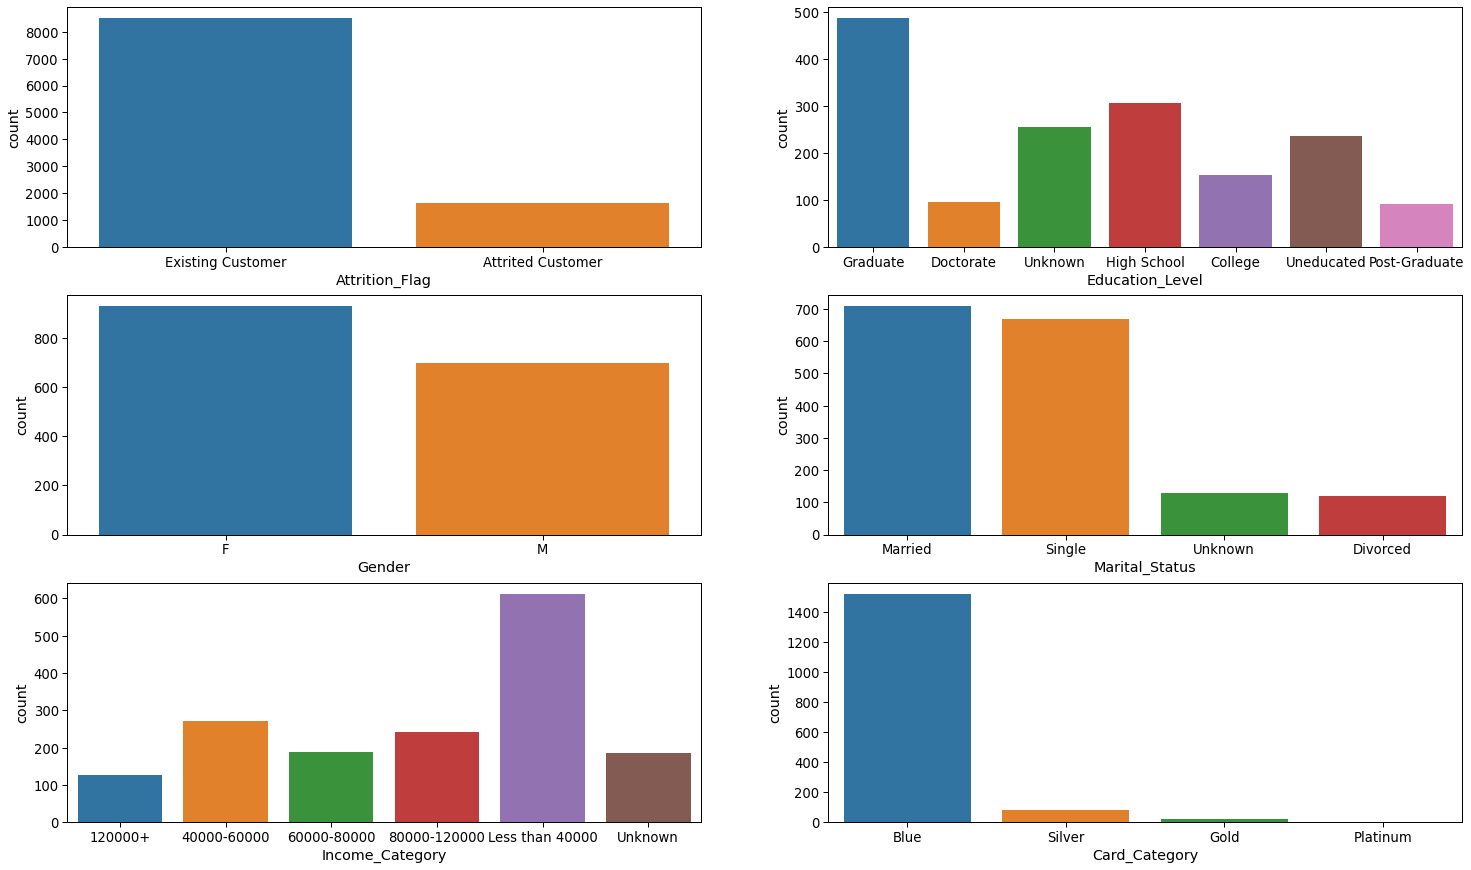

In [18]:
##Categorical data representation
sns. set_context("paper",font_scale=1.5)
fig, axarr = plt.subplots(3, 2, figsize=(25, 15))
sns.countplot(Bank_data.Attrition_Flag,data=churn_data,ax=axarr[0][0])
sns.countplot(x=churn_data.Education_Level,data=churn_data,ax=axarr[0][1])
sns.countplot(x=churn_data.Gender,data=churn_data,ax=axarr[1][0])
sns.countplot(x=churn_data.Marital_Status,data=churn_data,ax=axarr[1][1])
sns.countplot(x=churn_data.Income_Category,data=churn_data,ax=axarr[2][0])
sns.countplot(x=churn_data.Card_Category,data=churn_data,ax=axarr[2][1])

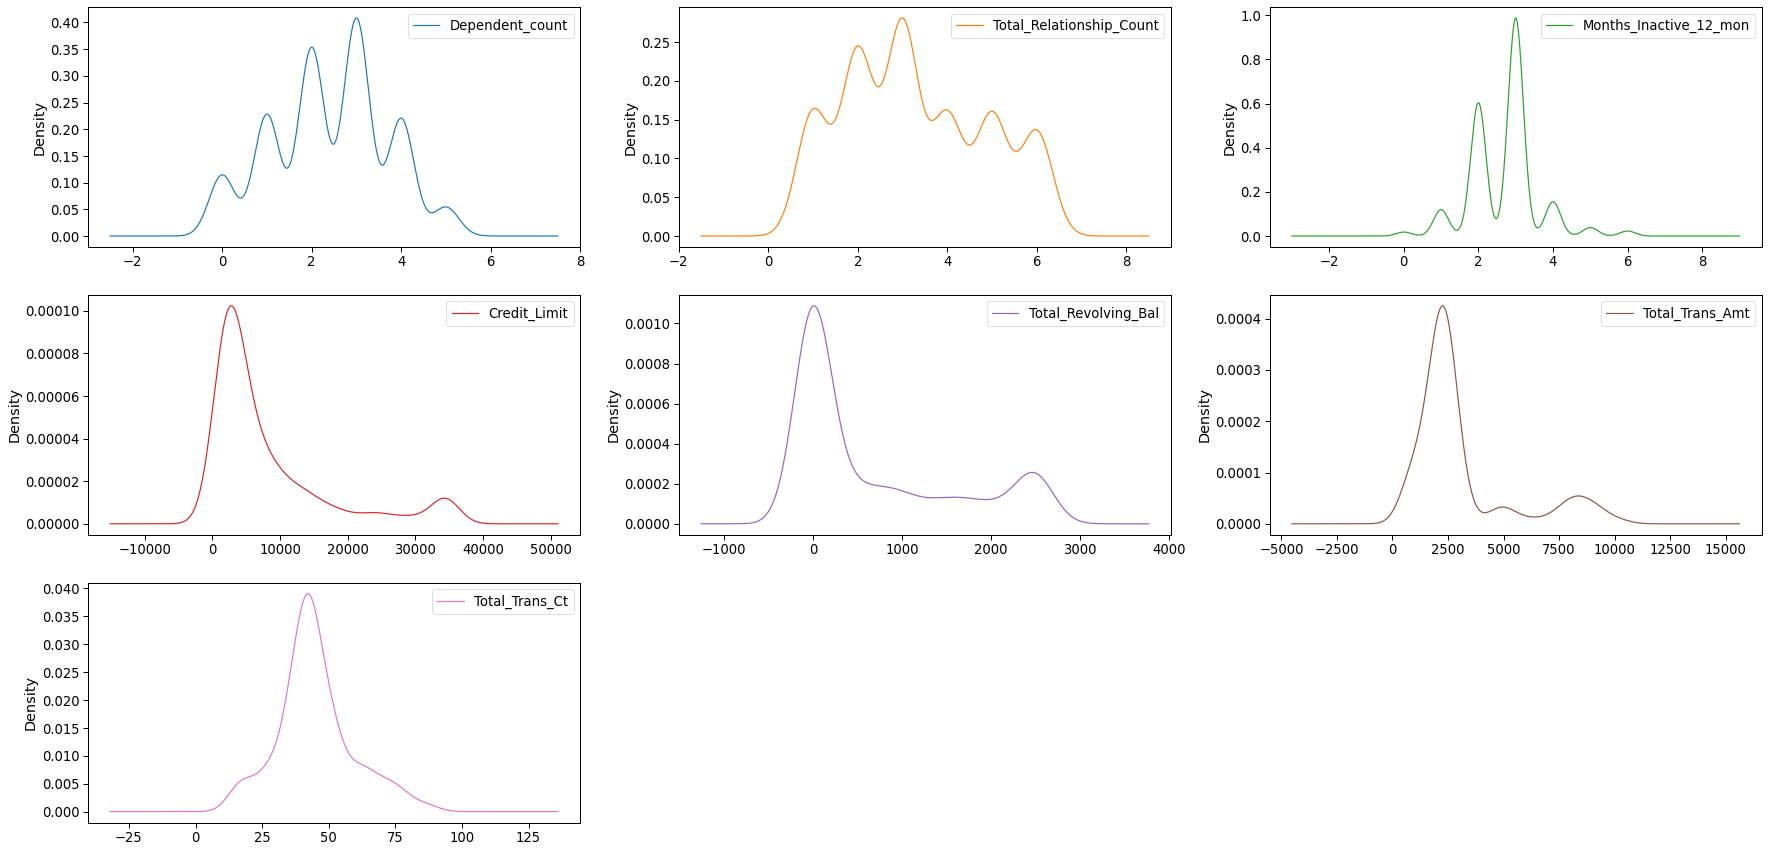

In [19]:
# set plot size
plt.rcParams["figure.figsize"] = [30,15]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
churn_data_numeric.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [20]:
churn_data_numeric.kurt()

Dependent_count            -0.618944
Total_Relationship_Count   -1.012831
Months_Inactive_12_mon      1.981655
Credit_Limit                2.294341
Total_Revolving_Bal        -0.534474
Total_Trans_Amt             1.653971
Total_Trans_Ct              0.570805
dtype: float64

In [21]:
churn_data_numeric.skew()

Dependent_count            -0.106235
Total_Relationship_Count    0.265179
Months_Inactive_12_mon      0.377828
Credit_Limit                1.804428
Total_Revolving_Bal         1.024055
Total_Trans_Amt             1.685336
Total_Trans_Ct              0.485945
dtype: float64

In [22]:
churn_data_numeric.corr()

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
Dependent_count,1.000000,-0.014728,-0.021507,0.048838,0.022778,-0.018971,0.011902
Total_Relationship_Count,-0.014728,1.000000,-0.043957,-0.060772,-0.002145,-0.041159,0.012153
Months_Inactive_12_mon,-0.021507,-0.043957,1.000000,0.003147,0.013449,-0.018865,0.007925
Credit_Limit,0.048838,-0.060772,0.003147,1.000000,0.035582,0.264930,0.197113
Total_Revolving_Bal,0.022778,-0.002145,0.013449,0.035582,1.000000,0.034759,0.025638
Total_Trans_Amt,-0.018971,-0.041159,-0.018865,0.264930,0.034759,1.000000,0.827189
Total_Trans_Ct,0.011902,0.012153,0.007925,0.197113,0.025638,0.827189,1.000000


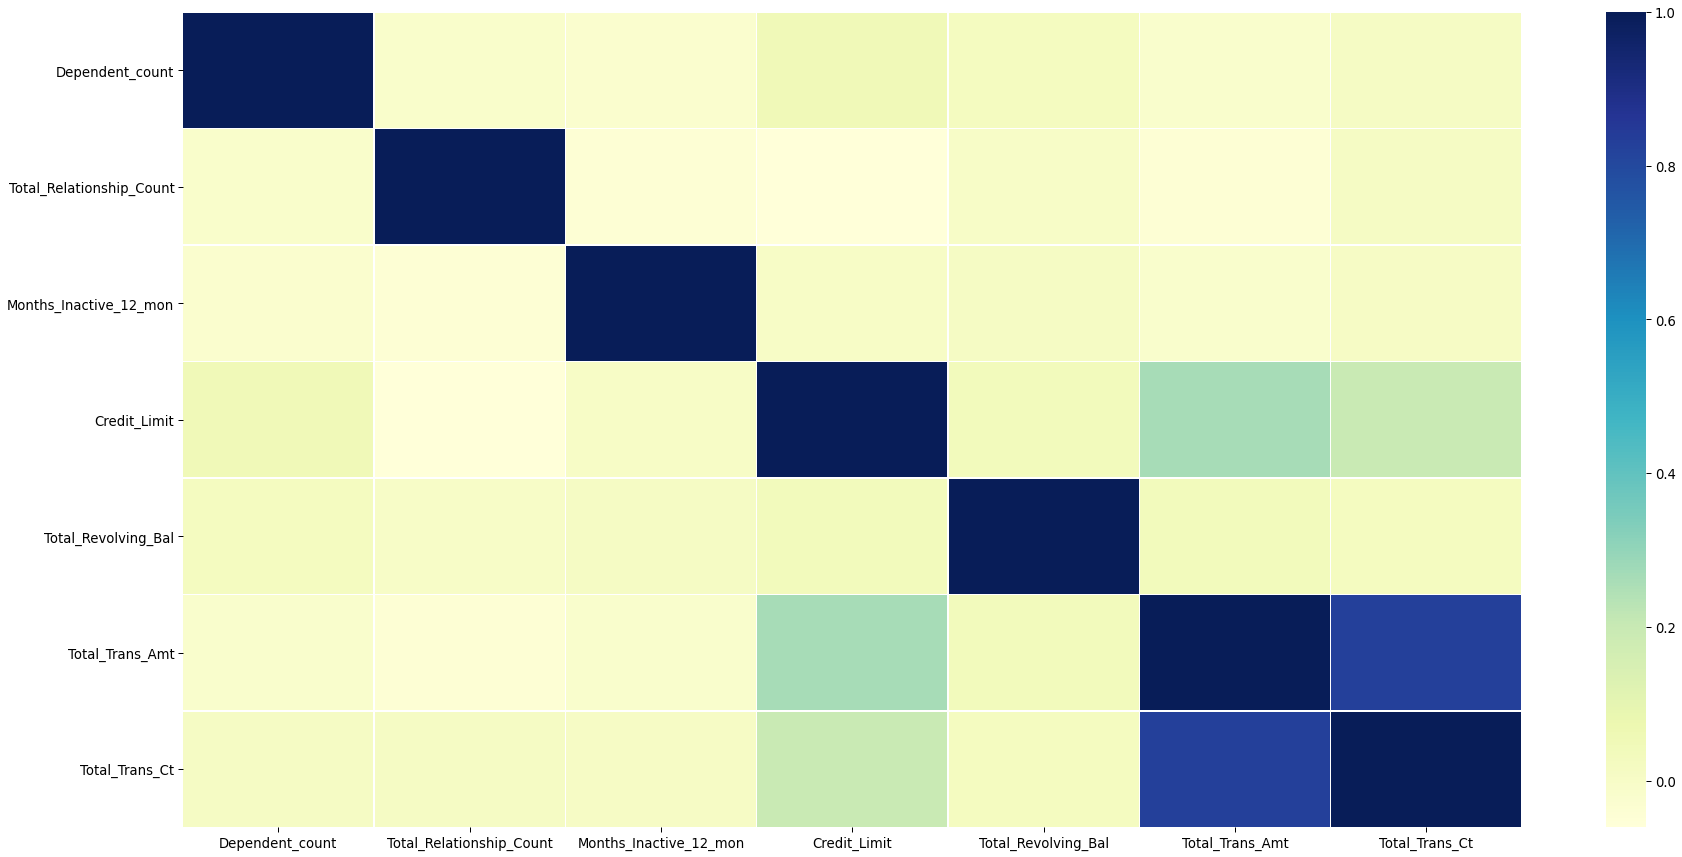

In [23]:
sns.heatmap(churn_data_numeric.corr(),cmap = "YlGnBu",linewidths=0.5)

Q1:People belonging to with high income group are more likely to get attrited (chi square test, incomed and attrition)
Q2:Is Education plays a vital role while it comes to using the credit card (Education , no. of customers, wilscxon test )
Q3:People with less dependent can get attrited 
Q4: people having high revolving balance is likely  to get attrited
Q5:Senior citizen people are more likely to discontinue the services
Q6:Females who are divorced are more likely to use the services (gender and martial status, attrition , chi square test)
Q7:People with more relation ship count are good contributors
Q8:People with less transaction count is likely to get attrited
Q9:Total change count value is more means customer will stay
Q 10:What is the probability of a person  education  less to get attritaed

# Current customer churn rate 

In [24]:
Bank_data.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [25]:
x1 = np.sum(Bank_data.Attrition_Flag == 'Existing Customer')
x2 =np.sum(Bank_data.Attrition_Flag == 'Attrited Customer')

In [26]:
n = len(Bank_data.Attrition_Flag)

In [27]:
x1/n

0.8393403772094401

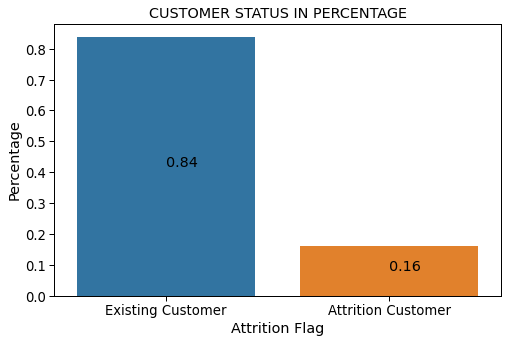

In [28]:
plt.figure(figsize=(8,5))
x = ['Existing Customer','Attrition Customer']
y = [x1/n,x2/n]
sns.barplot(x,y)
plt.xlabel('Attrition Flag')
plt.ylabel('Percentage')
plt.title('CUSTOMER STATUS IN PERCENTAGE')

for index, value in enumerate(y):
    plt.text(index,value/2,str(round(value,2)))

# <a id = "HT"> </a>
# HYPOTHESIS TESTING

## Q1: Manager believes there is a equal chance of Attrition for all Income groups

## Chi Square goodness of Fit Test

### Null Hypothesis : All the Income categories have equally Attrition Ratio
    
### Alternate Hypothesis: The Income categories have different Attrition Ratio

In [29]:
observed_values = np.array(churn_data['Income_Category'].value_counts())
observed_values

array([612, 271, 242, 189, 187, 126], dtype=int64)

In [30]:
n=churn_data.Income_Category.value_counts().sum()
expected_values = np.array([(1/6)*n,(1/6)*n,(1/6)*n,(1/6)*n,(1/6)*n,(1/6)*n])

In [31]:
chi_sq_stat, p_value = stats.chisquare(observed_values,expected_values)
print('Chi Square Statistic is',chi_sq_stat)
print('P value is',p_value)

Chi Square Statistic is 560.2710510141366
P value is 7.734398388060016e-119


##### Interpretation : As p value is less than 0.05, we reject the Null hypothesis and conclude that the Manager claim is not true and attrition varies with the income groups

In [32]:
df1 = churn_data['Income_Category'].value_counts().reset_index()
df1

,index,Income_Category
0,Less than 40000,612
1,40000-60000,271
2,80000-120000,242
3,60000-80000,189
4,Unknown,187
5,120000+,126


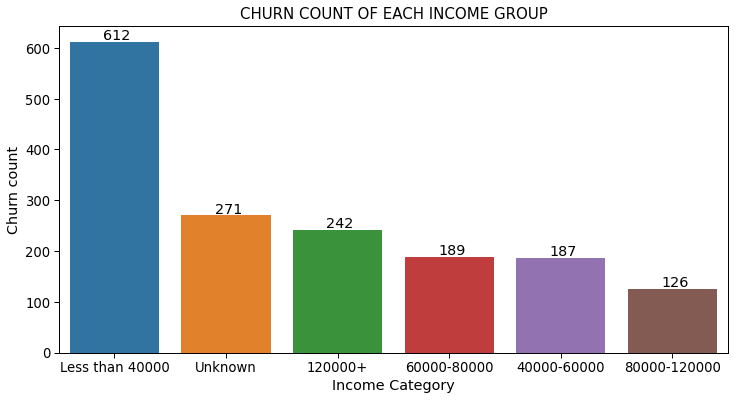

In [33]:
plt.figure(figsize=(12,6))
x=churn_data.Income_Category.unique()
y=observed_values
sns.barplot(x,y)
plt.xlabel('Income Category')
plt.ylabel('Churn count')
plt.title('CHURN COUNT OF EACH INCOME GROUP',pad=7.5,fontsize=15)
for index, value in enumerate(df1.Income_Category):
    plt.text(index-0.1,value+3.5,str(round(value,2)))

## Q2: Manager wishes to know if the average use of credit card is same among all Marital Status categories

## Kruskal - Wallis H test

### Null Hypothesis : Credit card usage is the same among all Marital categories
    
### Alternate Hypothesis: Credit card usage is the not same among all Marital categories

In [34]:
stat,pval = stats.shapiro(churn_data['Total_Trans_Ct'])
print('P value is',pval)

P value is 3.4062292600489428e-18


From the above result, we can see that the p-value is less than 0.05, we can say that data is not normally distributed


In [35]:
df2_1 = churn_data[churn_data['Marital_Status'] == 'Married']['Total_Trans_Ct']
df2_2 = churn_data[churn_data['Marital_Status'] == 'Single']['Total_Trans_Ct']
df2_3 = churn_data[churn_data['Marital_Status'] == 'Unknown']['Total_Trans_Ct']
df2_4 = churn_data[churn_data['Marital_Status'] == 'Divorced']['Total_Trans_Ct']

In [36]:
churn_data.Marital_Status.unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [37]:
F_crit = stats.chi2.isf(0.05,df=3)
F_crit

7.814727903251178

If F test Statistic is greater than 7.814, we reject the Null Hypothesis

In [38]:
F_stat,p_value = stats.kruskal(df2_1,df2_2,df2_3,df2_4)
print('F test Statistic is',F_stat)
print('P value',p_value)

F test Statistic is 24.287010519686348
P value 2.1759994712835256e-05


##### Here, F test statistic is greater than 7.814 and p value is less than 0.05, thus we reject the Null Hypothesis and conclude that average use of credit card is not same among all Marital categories

If Kruskal-Wallis H test rejects the null hypothesis; we conclude that at least one treatment has a different mean. The test does not distinguish a treatment with the different average value. The post-hoc test is used to identify such treatment(s). Thus we use the conover test as a post-hoc test.

In [39]:
df2 = churn_data.pivot_table(index='Marital_Status',values = 'Total_Trans_Ct',aggfunc=np.sum).reset_index()
df2

,Marital_Status,Total_Trans_Ct
0,Divorced,5449
1,Married,30501
2,Single,31222
3,Unknown,5935


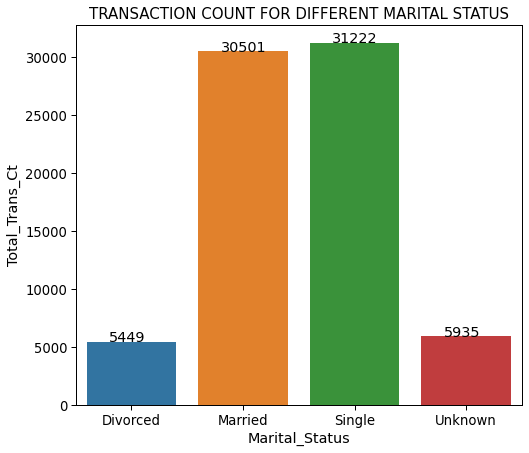

In [40]:
plt.figure(figsize = (8,7))
sns.barplot(x=df2.Marital_Status,y=df2.Total_Trans_Ct,data=df2)
plt.title('TRANSACTION COUNT FOR DIFFERENT MARITAL STATUS',fontsize=15)
for index, value in enumerate(df2.Total_Trans_Ct):
    plt.text(index-0.2,value,str(round(value,2)))

In [41]:
scikit_posthocs.posthoc_conover(a = df2, val_col = 'Total_Trans_Ct', group_col = 'Marital_Status')

,Divorced,Married,Single,Unknown
Divorced,1.0,NaN,NaN,NaN
Married,NaN,1.0,NaN,NaN
Single,NaN,NaN,1.0,NaN
Unknown,NaN,NaN,NaN,1.0


# Q3: Manager wants to check if the people with credit limit less than 10000 are having high churn rate

## Wilcoxon Signed Rank Test

### Null Hypothesis: Average credit limit of people churning is less than or equal to 10000
    
### Alternate Hypothesis: Average credit limit of people churning is more than 10000

In [42]:
df3 = np.array(churn_data['Credit_Limit'])
df3

array([ 1438.3,  7882. ,  1438.3, ...,  5409. ,  5281. , 10388. ])

In [43]:
df3 = np.array(random.sample(list(df3),50))

In [44]:
stats.shapiro(df3)

ShapiroResult(statistic=0.7047964334487915, pvalue=1.010016870139907e-08)

In [45]:
M0 = 10000
diff = df3-M0
diff

array([-8417. , -8346. ,  2211. , -5647. , 24516. , -8561.7, -6983. ,
       -1451. , -4499. , -5018. ,   573. , -8293. , -6393. , 21718. ,
       -5465. , -8334. , -5292. , -8561.7, -3586. , -7241. , -1523. ,
       -8370. , 24516. , -8561.7, -3776. ,  1328. , -3668. , -6302. ,
        7523. , -6565. ,  3303. , -6601. , -7742. ,  5809. , -8372. ,
       24516. ,  6362. , -8306. , -5065. , -1691. , -8425. , -7523. ,
       -7753. ,  -509. , -7181. , 19338. , 24516. , -8561.7, -4495. ,
       -3500. ])

In [46]:
stat, pvalue3= stats.wilcoxon(diff,alternative='greater')
print('P value is',pvalue3)

P value is 0.9941291559539942


##### Since P value is greater than 0.05, we fail to reject the Null hypothesis and conclude that customers having credit limit less than 10000 are having high churn ratio

In [47]:
df3a = len(df3[df3<=10000])
df3b = len(df3[df3>10000])

Text(0.5, 1.0, 'ATTRITION COUNT FOR CREDIT CARD LIMIT')

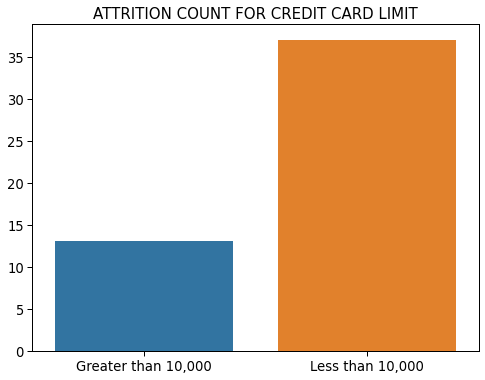

In [48]:
plt.figure(figsize=(8,6))
x = ['Greater than 10,000','Less than 10,000']
y = [df3b,df3a]
sns.barplot(x,y)
plt.title('ATTRITION COUNT FOR CREDIT CARD LIMIT',fontsize=15)

# Q4: Manager believes Customer Age and Marital Status columns are dependent and any one of the variable can be considered to address the churn analysis

## Chi Square Test of Independence

### Null Hypothesis: Cutomer_Age and Marital Status are independent
    
### Alternate Hypothesis: Cutomer_Age and Marital Status are dependent

In [49]:
df4 = pd.crosstab(churn_data['Marital_Status'],churn_data['Customer_Age'])
obs_values = df4.values
obs_values

array([[ 14,  49,  44,  14],
       [ 56, 300, 296,  57],
       [ 64, 256, 263,  85],
       [ 12,  59,  46,  12]], dtype=int64)

In [50]:
chi_sq_crit4 = stats.chi2.isf(0.05,df = 9)
print('Chi Square critical value is',chi_sq_crit4)

Chi Square critical value is 16.91897760462045


If test statistic is more than 16.91, we reject the Null Hypothesis

In [51]:
stat,p_value4,df,expected_values = stats.chi2_contingency(obs_values)
print('Statistic is',stat)
print('P value is',p_value4)
print('df = ',df)
print('Expected values are',expected_values)

Statistic is 13.526546833590542
P value is 0.14019161994764223
df =  9
Expected values are [[ 10.8580209   49.38168408  48.26613399  12.49416103]
 [ 63.62261832 289.35218193 282.81561156  73.2095882 ]
 [ 59.94345421 272.61954518 266.46097111  68.9760295 ]
 [ 11.57590658  52.64658881  51.45728334  13.32022127]]


##### Since test statistic is less than 16.91 and p value is greater than 0.05, we fail to reject the Null hypothesis and conclude that Customer Age and Marital Status are independent

### Once we communicated the same to the manager, he was satisfied with the explanation but came up with one more claim stating Senior citizens form the major contributors to churn count

In [52]:
df4a = pd.DataFrame({'Attrition_count':churn_data.Customer_Age.value_counts(),'Contribution':churn_data.Customer_Age.value_counts()/len(churn_data.Customer_Age)})
df4a

,Attrition_count,Contribution
Middle_Age,664,0.408113
Senior,649,0.398894
Super_senior,168,0.103258
Adults,146,0.089736


Text(0.5, 1.0, 'ATTRITION COUNT VS AGE CATEGORY')

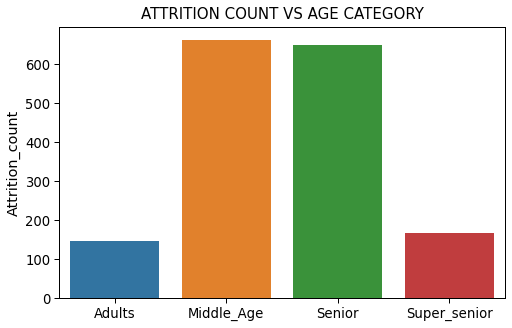

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(x=df4a.index,y='Attrition_count',data=df4a)
plt.title('ATTRITION COUNT VS AGE CATEGORY',fontsize=15,pad= 7.5)


#### Senior citizen along with Middle age forms the major contributors of Attrition count

# Q5: Total Revolving balance of both the customers are more or less equal

## MANN-WHITNEY U TEST

### Null Hypothesis: Revolving balance of both Existing and Attrited customers are equal
    
### Alternate Hypothesis: Revolving balance of both Existing and Attrited customers are not equal

Text(0.5, 1.0, 'SPREAD OF TOTAL REVOLVING BALANCE')

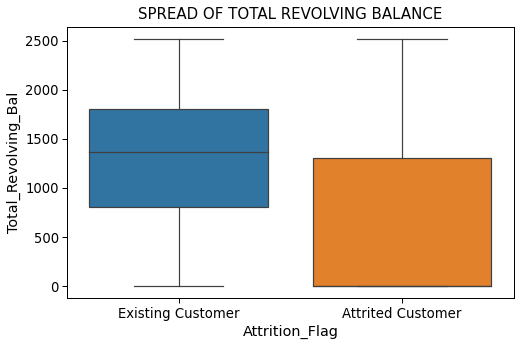

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x=Bank_data.Attrition_Flag,y=Bank_data.Total_Revolving_Bal,data=Bank_data)
plt.title('SPREAD OF TOTAL REVOLVING BALANCE',fontsize=15,pad= 7.5)

In [55]:
Bank_data.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [56]:
rev1 = Bank_data[Bank_data['Attrition_Flag']=='Existing Customer']['Total_Revolving_Bal']
rev1 = random.sample(list(rev1),k=50)
rev2 = Bank_data[Bank_data['Attrition_Flag']=='Attrited Customer']['Total_Revolving_Bal']
rev2 = random.sample(list(rev2),k=50)

In [57]:
print(stats.shapiro(rev1))
print(stats.shapiro(rev2))

ShapiroResult(statistic=0.925936222076416, pvalue=0.0038907749112695456)
ShapiroResult(statistic=0.7775449752807617, pvalue=2.766122975117469e-07)


##### Since p value for both the variables are less than 0.05, we can say that the data is not normally distributed

In [58]:
test_stat5, p_value5 = stats.mannwhitneyu(rev1, rev2, alternative = 'two-sided')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat5)
print('p-value:', p_value5)

Test statistic: 1673.0
p-value: 0.0030128820378463313


##### Since p value is less than 0.05, we reject the Null hypothesis and conclude that Total Revolving balance for Attrited and Existing customers are not the same

In [59]:
a1 = np.sum(rev1)
a2 = np.sum(rev2)

In [60]:
df5 = pd.DataFrame({'Existing_Customer':a1,'Attrition_customer':a2},index=[0])
df5

,Existing_Customer,Attrition_customer
0,64143,36351


Text(0.5, 1.0, 'REVOLVING BALANCE FOR ATTRITION CATEGORY')

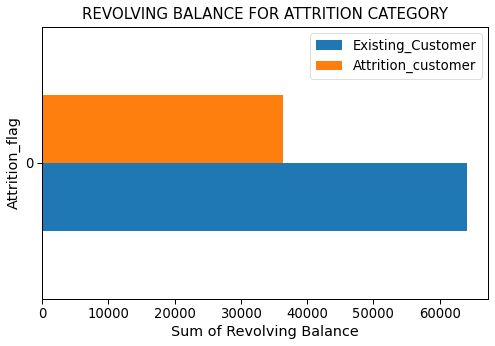

In [61]:
df5.plot(kind='barh',figsize=(8,5))
plt.ylabel('Attrition_flag')
plt.xlabel('Sum of Revolving Balance')
plt.title('REVOLVING BALANCE FOR ATTRITION CATEGORY',fontsize=15,pad=7.5)


#### Interpretation: Revolving balance is inversely proportional to the Attrition rate, more the total revolving balance, less the chance of attrition. 
#### Hence the manager can focus of customers with less revolving balance

# Q6:What effects does Gender and Educational background has towards the churn rate


### Null Hypothesis: Gender and Education background are Independent
    
### Alternate Hypothesis: Gender and Education background are Dependent

In [62]:
df6 = pd.crosstab(churn_data.Gender,churn_data.Education_Level)
df6

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Gender,,,,,,,
F,79,64,293,172,44,127,151
M,75,31,194,134,48,110,105


In [63]:
observed_values6 = np.array(df6)
observed_values6

array([[ 79,  64, 293, 172,  44, 127, 151],
       [ 75,  31, 194, 134,  48, 110, 105]], dtype=int64)

In [64]:
chi_sq_crit6 = stats.chi2.isf(0.05,df = 6)
print('Chi Square critical value is',chi_sq_crit6)

Chi Square critical value is 12.59158724374398


If test statistic is greater than 12.59, we reject the Null hypothesis

In [65]:
stat,p_value6,df,expected_values6 = stats.chi2_contingency(observed_values6)
print('Statistic is',stat)
print('P value is',p_value6)
print('df = ',df)
print('Expected values are',expected_values6)

Statistic is 12.968633573365667
P value is 0.04353676108471542
df =  6
Expected values are [[ 88.02704364  54.30239705 278.3712354  174.91087892  52.58758451
  135.47019053 146.33066994]
 [ 65.97295636  40.69760295 208.6287646  131.08912108  39.41241549
  101.52980947 109.66933006]]


#### Test statistic is very slightly greater than 12.59, thus we reject the Null Hypothesis and conclude both Gender and Educational Background are dependent.
#### Since the value is very close , lets check the individual variables effect and conclude accordingly

### Null Hypothesis: Churn rate across Genders is equal
    
### Alternate Hypothesis: Churn rate is different across genders

In [66]:
observed_gender = np.array(churn_data['Gender'].value_counts())
observed_gender

array([930, 697], dtype=int64)

In [67]:
n = len(churn_data)
n

1627

In [68]:
expected_gender = np.array([0.5*n,0.5*n])
expected_gender

array([813.5, 813.5])

In [69]:
chi_sq_stat, p_value6a = stats.chisquare(observed_gender,expected_gender)
print('Chi Square Statistic is',chi_sq_stat)
print('P value is',p_value6a)

Chi Square Statistic is 33.367547633681625
P value is 7.628637233208865e-09


Since p value is less than 0.05, we reject the Null Hypothesis and conclude that Churn rate is different for different genders

In [70]:
df6a = pd.DataFrame({'Gender':churn_data.Gender.value_counts()})
df6a

,Gender
F,930
M,697


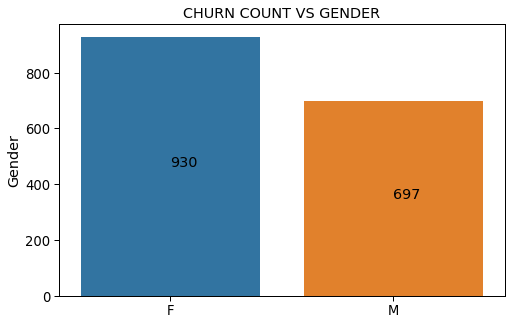

In [71]:
plt.figure(figsize=(8,5))
sns.barplot(x=df6a.index,y= 'Gender',data=df6a )
plt.title('CHURN COUNT VS GENDER')
for index, value in enumerate(df6a.Gender):
    plt.text(index,value/2,str(round(value,2)))

##### Interpretation: Female customers has more churn count than male customers

### Null Hypothesis: Churn rate across all Educational backgrounds are equal
    
### Alternate Hypothesis: Churn rate across all Educational backgrounds are not equal

In [72]:
observed_edu = np.array(churn_data['Education_Level'].value_counts())
observed_edu

array([487, 306, 256, 237, 154,  95,  92], dtype=int64)

In [73]:
n = len(churn_data)
n

1627

In [74]:
expected_edu = np.array([(1/7)*n,(1/7)*n,(1/7)*n,(1/7)*n,(1/7)*n,(1/7)*n,(1/7)*n])
expected_edu

array([232.42857143, 232.42857143, 232.42857143, 232.42857143,
       232.42857143, 232.42857143, 232.42857143])

In [75]:
chi_sq_stat, p_value6b = stats.chisquare(observed_edu,expected_edu)
print('Chi Square Statistic is',chi_sq_stat)
print('P value is',p_value6b)

Chi Square Statistic is 497.15795943454214
P value is 3.442815726057525e-104


Since p value is less than 0.05, we reject the Null Hypothesis and conclude that Churn rate is different across Educational backgrounds

In [76]:
df6b = pd.DataFrame({'Educational_Level':churn_data.Education_Level.value_counts()})
df6b

,Educational_Level
Graduate,487
High School,306
Unknown,256
Uneducated,237
College,154
Doctorate,95
Post-Graduate,92


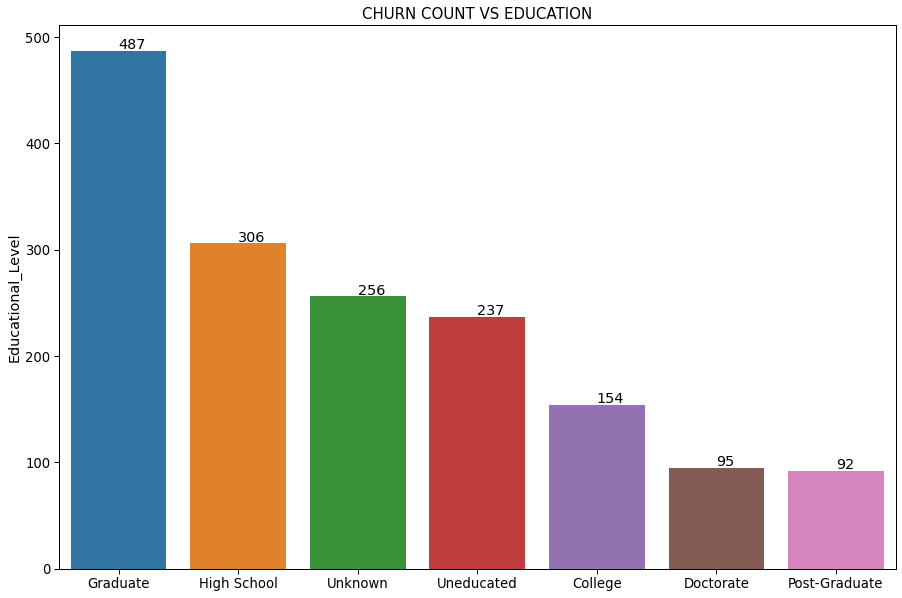

In [77]:
plt.figure(figsize=(15,10))
sns.barplot(x=df6b.index,y= 'Educational_Level',data=df6b )
plt.title('CHURN COUNT VS EDUCATION',fontsize=15)
for index, value in enumerate(df6b.Educational_Level):
    plt.text(index,value+1.5,str(round(value,2)))

# Q7: Which card category has more churn rate

In [78]:
df_card = churn_data['Card_Category'].value_counts()
df_card

Blue        1519
Silver        82
Gold          21
Platinum       5
Name: Card_Category, dtype: int64

Text(0.5, 1.0, 'CARD CATEGORY CHURN RATE')

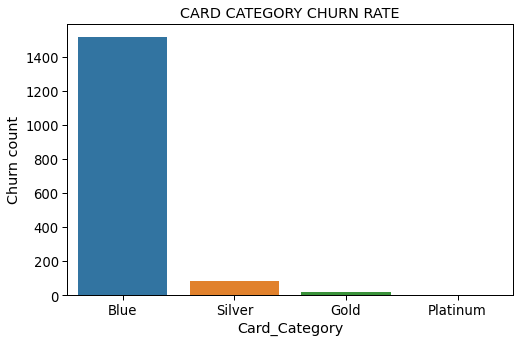

In [79]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_card.index,y=df_card)
plt.xlabel('Card_Category')
plt.ylabel('Churn count')
plt.title('CARD CATEGORY CHURN RATE')

In [80]:
df_rel_count = churn_data['Total_Relationship_Count'].value_counts()
df_rel_count

3    400
2    346
1    233
5    227
4    225
6    196
Name: Total_Relationship_Count, dtype: int64

Text(0.5, 1.0, 'RELATIONSHIP COUNT VS CHURN RATE')

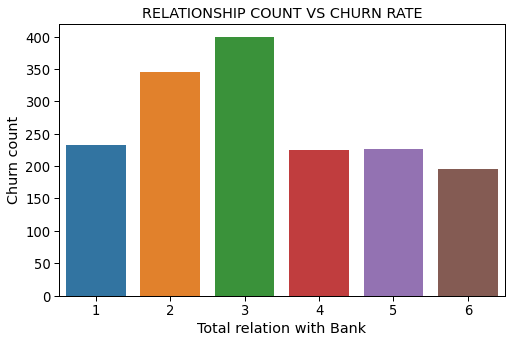

In [81]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_rel_count.index,y=df_rel_count)
plt.xlabel('Total relation with Bank')
plt.ylabel('Churn count')
plt.title('RELATIONSHIP COUNT VS CHURN RATE')

In [82]:
df_dep = churn_data['Dependent_count'].value_counts()
df_dep

3    482
2    417
1    269
4    260
0    135
5     64
Name: Dependent_count, dtype: int64

 <a id = "SIMUL"> </a>
## SIMULATION

In [83]:
def central_limit_theorem(df,column_names,n_samples = 1000, sample_size = 500):
    min_value = 0 
    max_value = df.count()  
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) 
        b[i] = df[x].mean()   
    c = pd.DataFrame()
    c['sample'] = b.keys()   
    c['Mean'] = b.values()  
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,2)
    sns.distplot(c.Mean,color='green')
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(df,color='red')
    plt.title(f"Population Distribution. \n \u03bc = {round(df.mean(), 3)} & \u03C3 = {round(df.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.show()




In [84]:
series1 = Bank_data.Total_Trans_Ct
series2 = Bank_data.Credit_Limit
series3 = Bank_data.Total_Revolving_Bal
series4 = Bank_data.Dependent_count
series5 = Bank_data.Total_Relationship_Count
series6 = Bank_data.Total_Trans_Amt
series7 = Bank_data.Customer_Age


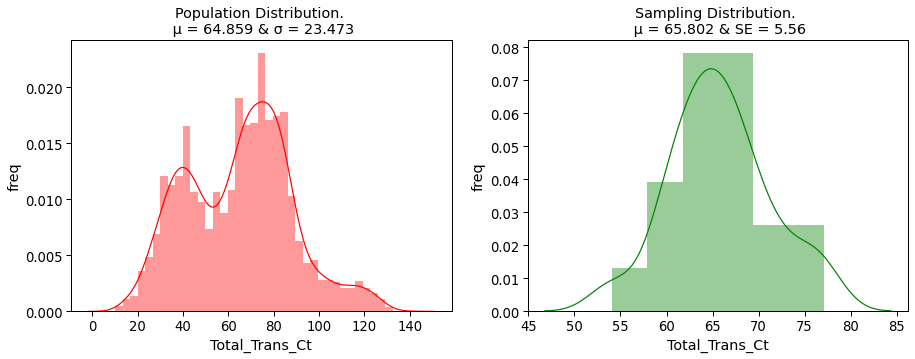

In [85]:
central_limit_theorem(series1,'Total_Trans_Ct',n_samples = 20, sample_size = 20)

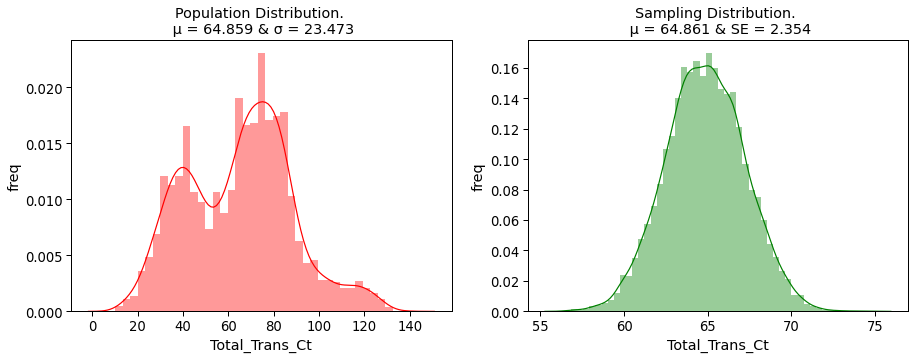

In [86]:
central_limit_theorem(series1,'Total_Trans_Ct',n_samples = 10000, sample_size = 100)

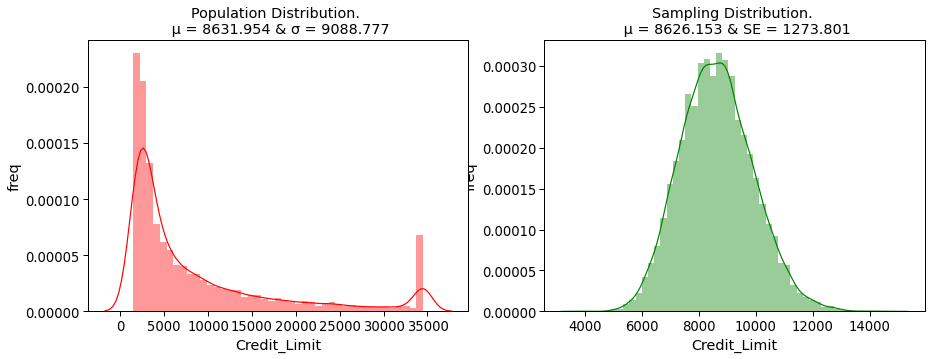

In [87]:
central_limit_theorem(series2,'Credit_Limit',n_samples =10000, sample_size = 50)

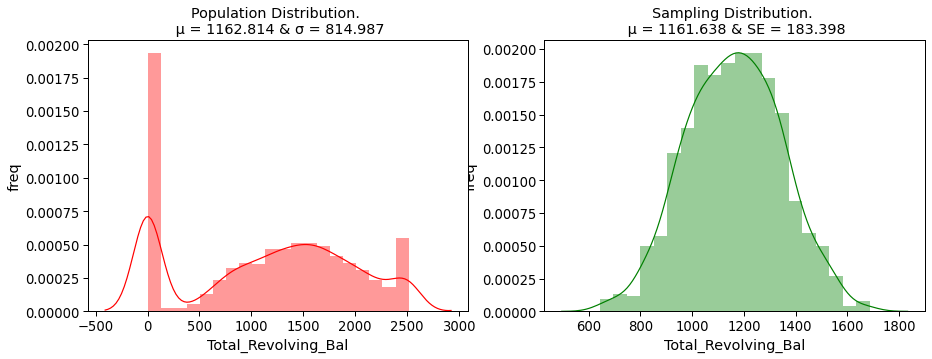

In [88]:
central_limit_theorem(series3,'Total_Revolving_Bal',n_samples =1000, sample_size = 20)